# **ST1/ST1G Assignment 9 (Capstone Programming Project) - Australian Vehicle Prices**
  

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Software_Technology1


/content/drive/MyDrive/Software_Technology1


In [ ]:
!ls /content/drive/MyDrive/Software_Technology1

AustralianVehiclePrices.ipynb  Tester.ipynb  Untitled0.ipynb  Vehicle.csv


### This Project is based on the famous Australian Vehicle Prices available from Kaggle repository https://www.kaggle.com/datasets/nelgiriyewithana/australian-vehicle-prices.


*  This dataset contains the latest information on car prices in Australia for the year 2023
*   My project task is to create a machine learning model which can predict the average price of vehicles based on its characteristics.
* For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on (machine learning/AI algorithms, regression algorith for example) available from different Python packages, modules and classes.


### Step 1: Reading the data Reading the data with python
This is one of the most important steps in data analysis! You must understand the data and the domain well before trying to apply any machine learning/AI algorithm.

In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
VehicleData=pd.read_csv('/content/drive/MyDrive/Software_Technology1/Vehicle.csv', encoding='latin')
print('Shape before deleting duplicate values:', VehicleData.shape)

# Removing duplicate rows if any
VehicleData=VehicleData.drop_duplicates()
print('Shape After deleting duplicate values:', VehicleData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
VehicleData.head(8)


Shape before deleting duplicate values: (16734, 19)
Shape After deleting duplicate values: (16734, 19)


,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990
5,Toyota,2004.0,Estima,ON FOUR WHEELS,2004 Toyota Estima T EDITION,USED,Automatic,-,Other,Unleaded,-,160230,Grey / -,"Saint Marys, NSW",-,Commercial,NaN,NaN,9990
6,Land,2017.0,Rover,SUV,2017 Land Rover Range Rover Evoque TD4 180 HSE...,USED,Automatic,"4 cyl, 2 L",AWD,Diesel,5.1 L / 100 km,67662,White / Black,"Blacktown, NSW",4 cyl,SUV,2 Doors,4 Seats,62280
7,Nissan,2000.0,Pulsar,Hatchback,2000 Nissan Pulsar LX,USED,Automatic,"4 cyl, 1.6 L",Front,Unleaded,8 L / 100 km,300539,Red / Grey,"Wentworthville, NSW",4 cyl,Hatchback,5 Doors,5 Seats,2995


# Key observations from Step 1 about Data Description
* This file contains 16734 car details for customers to choose from the dataset, no duplicate values.

* Here total attributes number is 19.
The attributes are: Brand, Year, Model, Car/SUV, Title, Used or New, Transmission, Engine, Drive Type, Fuel Type, Fuel Consumption, Kilometres, Colour (Ext/Int), Location, Cylinders in Engine, Body Type, Doors, Seats, Price.

 * Shape before deleting duplicate values: (16734, 19)
 * Shape After deleting duplicate values: (16734, 19)

##Step 2 :Problem Statement Definition
Develop a machine learning model to predict car price for individuals based on various factors such as Brand, Year, Model, Car/SUV, Title, Used or New, Transmission, Engine, Drive Type, Fuel Type, Fuel Consumption, Kilometres, Colour (Ext/Int), Location, Cylinders in Engine, Body Type, Doors, Seats.

 The model should provide accurate estimates of car prices for customers, enabling the customers to make an informed decision.

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous**.

# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

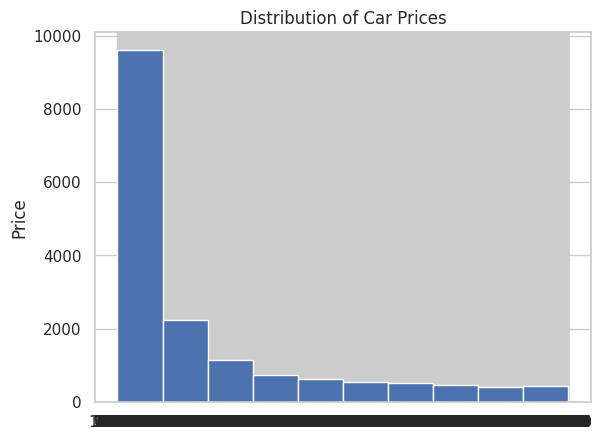

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the Price values

VehicleData['Price'].hist()

# Add labels and title
plt.title('Distribution of Car Prices')
plt.ylabel('Price')

# Show the plot
plt.show()

## Observations from Step 4
* The data distribution of the target variable is satisfactory to proceed further.
* There are sufficient number of rows for each type of values to learn from

## Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous


## Observations from Step 5 - Basic Exploratory Data Analysis
* Based on the basic exploration above, we can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* Brand - Continuous. Selected
* Year - Continuous. Selected
* Model - Continuous. Selected
* Car/Suv - Continuous. Selected
* Title - Continuous. Selected
* UsedOrNew - Categorical. Selected
* Transmission - Categorical. Selected
* Engine - Continuous. Selected
* DriveType - Categorical. Selected
* FuelType - Categorical. Selected
* FuelConsumption - Continuous. Selected
* Kilometres - Continuous. Selected
* ColourExtInt - Continuous. Selected
* Location - Continuous. Selected
* CylindersinEngine - Categorical. Selected
* BodyType - Categorical. Selected
* Doors - Categorical. Selected
* Seats - Categorical. Selected
* Price - Continuous. Selected. This is the Target or Class Variable, which needs to be predicted by the proposed regression model!

## Step 6: Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

## Step 7: Visual Exploratory Data Analysis
* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step,  we could spotted Eight categorical predictors in the data

* Categorical Predictors:

* UsedorNew
* Transmission
* DriveType
* FuelType
* CylindersinEngine
* BodyType
* Doors
* Seats

* We will use bar charts to see how the data is distributed for these categorical columns.

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

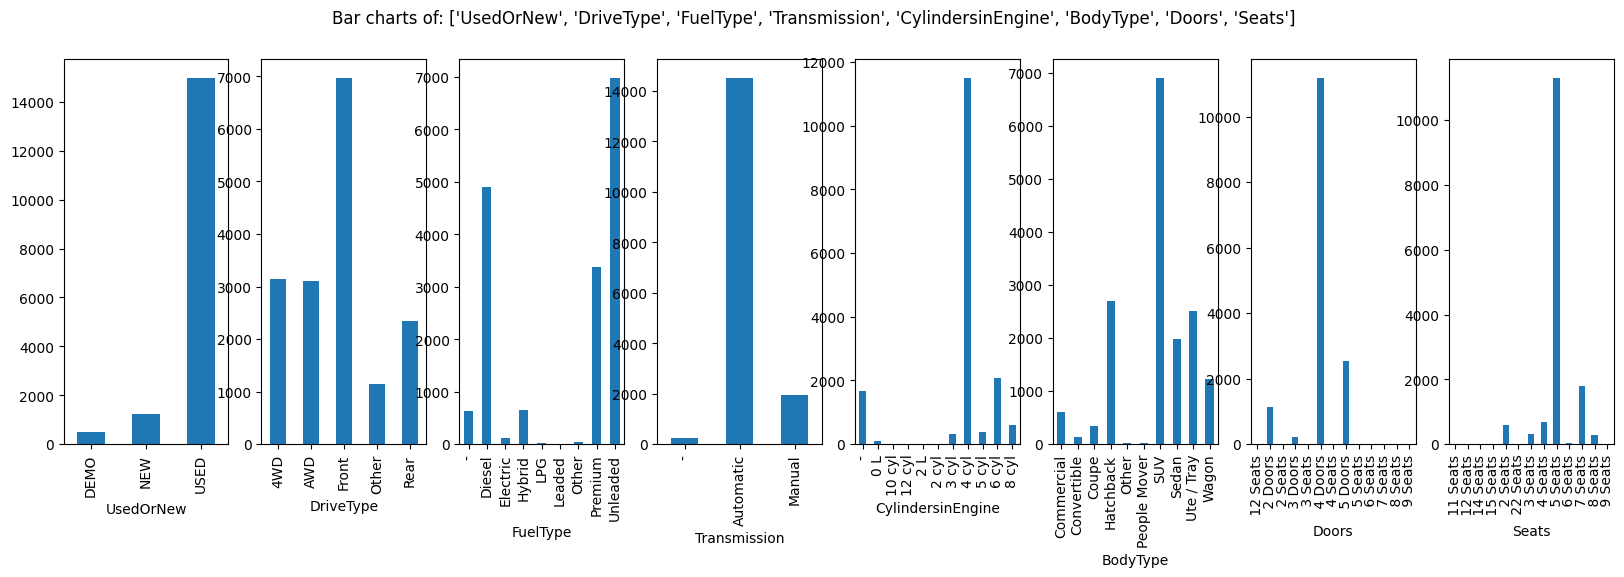

In [ ]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=VehicleData, colsToPlot=['UsedOrNew', 'DriveType', 'FuelType', 'Transmission', 'CylindersinEngine', 'BodyType', 'Doors', 'Seats'])

## Observations from Step 8 - Visual Exploratory Data Analysis
* Bar Charts have allowed interpretation on the two data columns
* The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* In the ideal bar chart each category has comparable frequency. * Hence, there are enough rows for each category in the data for the ML/AI regression algorithm to learn.
* If there is a column which shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.
* These kind of columns may not be very helpful in machine learning model development.
* We can confirm this with the correlation analysis step coming up,  and take a final call to select or reject the column/data attribute.
* In this dataset, it is worth noting that "UsedOrNew" has a left skewed distribution.
* Such columns may not be correlated with the target variable because there is no information to learn.
* The algorithms cannot find any rule like when the value is this then the target variable is that.

* Selected Categorical Variables (**UsedOrNew, Transmission,
DriveType , FuelType, CylindersinEngine, BodyType, Doors, Seats ***): All the eight categorical variables are selected for further analysis

#Step 9: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.

* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.

* As the treatment will be slightly different for each column

* Why I should analyse the outliers?

* Outliers bias the building of machine learning models.

* As the algorithm tries to fit the extreme value, it goes away from majority of the data.

* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.

* Option-2: Impute the outlier values with a logical business value

* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.

In [ ]:
#Replacing outliers for 'Price '
# Finding nearest values to 52000 mark
VehicleData[VehicleData['Price']<52000].sort_values(by='Price',ascending=False)

In [ ]:
import pandas as pd

# Load the Australian Vehicle Prices Dataset
VehicleData = pd.read_csv('/content/drive/MyDrive/Software_Technology1/Vehicle.csv')

# Check column names
print(Vehicledata.columns)

# Inspect the dataset
print(VehicleData.head())

# Extract the target variable if the column name is correct
if 'Price' in VehicleData.columns:
    target_variable = VehicleData['Price']
    print(target_variable)
else:
    print("Column 'Price' not found in the dataset.")

Index(['Brand', 'Year', 'Model', 'Car/Suv', 'Title', 'UsedOrNew',
       'Transmission', 'Engine', 'DriveType', 'FuelType', 'FuelConsumption',
       'Kilometres', 'ColourExtInt', 'Location', 'CylindersinEngine',
       'BodyType', 'Doors', 'Seats', 'Price'],
      dtype='object')
           Brand    Year   Model               Car/Suv  \
0      Ssangyong  2022.0  Rexton  Sutherland Isuzu Ute   
1             MG  2022.0     MG3             Hatchback   
2            BMW  2022.0    430I                 Coupe   
3  Mercedes-Benz  2011.0    E500                 Coupe   
4        Renault  2022.0  Arkana                   SUV   

                                       Title UsedOrNew Transmission  \
0       2022 Ssangyong Rexton Ultimate (awd)      DEMO    Automatic   
1  2022 MG MG3 Auto Excite (with Navigation)      USED    Automatic   
2                      2022 BMW 430I M Sport      USED    Automatic   
3           2011 Mercedes-Benz E500 Elegance      USED    Automatic   
4             

# Step 10: Choosing the appropriate ML/AI Algorithm for Data Analysis.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
VehicleData = pd.read_csv('/content/drive/MyDrive/Software_Technology1/Vehicle.csv')

# Perform one-hot encoding for categorical variables
VehicleData_encoded = pd.get_dummies(VehicleData, columns=['UsedOrNew', 'Transmission', 'DriveType','FuelType','Bodytype','Doors','Seats' ])

# Prepare the data
X = VehicleData_encoded.drop(columns=['Price'])
y = VehicleData_encoded['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regression model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

## Step 11: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the vehicle?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous


In [ ]:
# Looking at sample rows in the data
VehicleData.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [ ]:
# Looking at sample rows in the data
VehicleData.tail()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
16729,Toyota,2014.0,Alphard,SYC Cars,2014 Toyota Alphard,USED,Automatic,-,Front,Unleaded,-,66000,Grey / -,"Rocklea, QLD",-,Commercial,7 Seats,NaN,29500
16730,Mercedes-Benz,2012.0,S-Class,USED Dealer ad,2012 Mercedes-Benz S-Class CDI BlueTEC,USED,Automatic,-,Rear,Diesel,-,117432,Silver / -,"Port Melbourne, VIC",-,NaN,NaN,NaN,39888
16731,Suzuki,2022.0,Vitara,Bremer Suzuki - New,2022 Suzuki Vitara 1.6L,DEMO,Automatic,"4 cyl, 1.6 L",Front,Unleaded,6.2 L / 100 km,5165,Yellow / -,"Dinmore, QLD",4 cyl,SUV,4 Doors,5 Seats,35280
16732,Mercedes-Benz,2016.0,GLC250,SUV,2016 Mercedes-Benz GLC250,USED,Automatic,"4 cyl, 2 L",AWD,Premium,7.2 L / 100 km,85525,Grey / Black,"Albion, QLD",4 cyl,SUV,4 Doors,5 Seats,41888
16733,Mercedes-Benz,2021.0,C200,Sedan,2021 Mercedes-Benz C200,USED,Automatic,"4 cyl, 2 L",Rear,Unleaded,7 L / 100 km,31852,Gold / -,"Yatala, QLD",4 cyl,Sedan,4 Doors,5 Seats,65888


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
VehicleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

In [ ]:
# Looking at the descriptive statistics of the data
VehicleData.describe(include='all')

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
count,16733,16733.000000,16733,16706,16733,16733,16733,16733,16733,16733,16733,16733,16733,16284,16733,16452,15130,15029,16731
unique,76,NaN,781,618,8804,3,3,106,5,9,157,14262,834,618,11,10,13,13,3794
top,Toyota,NaN,Hilux,SUV,2019 Hyundai I30 Active,USED,Automatic,"4 cyl, 2 L",Front,Unleaded,-,- / -,White / -,"Minchinbury, NSW",4 cyl,SUV,4 Doors,5 Seats,29990
freq,2784,NaN,430,5921,60,14994,14530,3950,6978,6985,1697,449,2846,544,11506,6907,11191,11313,252
mean,NaN,2016.229248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.247705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1940.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
VehicleData.nunique()

Brand                   76
Year                    45
Model                  781
Car/Suv                618
Title                 8804
UsedOrNew                3
Transmission             3
Engine                 106
DriveType                5
FuelType                 9
FuelConsumption        157
Kilometres           14262
ColourExtInt           834
Location               618
CylindersinEngine       11
BodyType                10
Doors                   13
Seats                   13
Price                 3794
dtype: int64

## Observations from Step 12 - Basic Exploratory Data Analysis
* Based on the basic exploration above, we can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* Brand - Continuous. Selected
* Year - Continuous. Selected
* Model - Continuous. Selected
* Car/Suv - Continuous. Selected
* Title - Continuous. Selected
* UsedOrNew - Categorical. Selected
* Transmission - Categorical. Selected
* Engine - Continuous. Selected
* DriveType - Categorical. Selected
* FuelType - Categorical. Selected
* FuelConsumption - Continuous. Selected
* Kilometres - Continuous. Selected
* ColourExtInt - Continuous. Selected
* Location - Continuous. Selected
* CylindersinEngine - Categorical. Selected
* BodyType - Categorical. Selected
* Doors - Categorical. Selected
* Seats - Categorical. Selected
* Price - Continuous. Selected. This is the Target or Class Variable, which needs to be predicted by the proposed regression model!

## Step 13
 Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

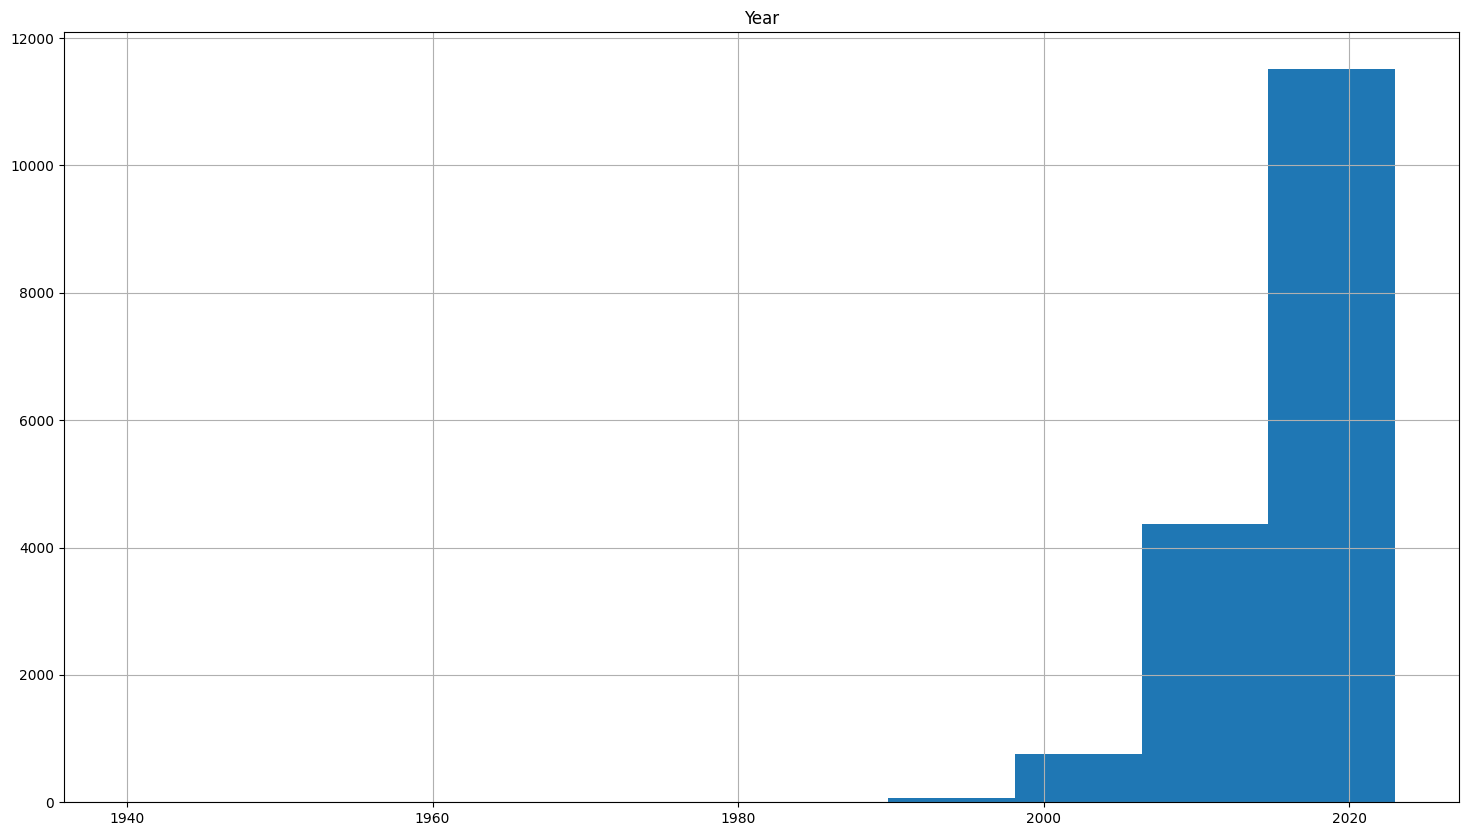

In [ ]:
# Plotting histograms of multiple columns together
VehicleData.hist(['Brand','Year','Model','Car/Suv', 'Title','Engine','FuelConsumption','Kilometres','ColourExtInt','Location','Price'], figsize=(18,10))

In [ ]:
#Step 11 :Feature Selection based on data distribution

#Step 14 :Feature Selection based on data distribution

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
Vehicle_data = pd.read_csv('Vehicle.csv')

# Perform one-hot encoding for categorical variables
categorical_columns = ['UsedOrNew', 'Transmission', 'DriveType','FuelType','CylindersinEngine','BodyType','Doors','Seats']  # Ensure column names are lowercase
Vehicle_data_encoded = pd.get_dummies(Vehicle_data, columns=categorical_columns)

# Define features and target variable
X = Vehicle_data_encoded.drop(columns=['Price'])  # Features
y = Vehicle_data_encoded['Price']  # Target variable

# Use statistical tests to determine feature importance
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)
print("Feature Importance Scores:")
print(feature_scores)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Feature', data=feature_scores, palette='viridis')
plt.title('Feature Importance Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

# Select top k features based on importance scores
k = 5  # Example: Select top 5 features
selected_features = feature_scores['Feature'].head(k).tolist()
print("Selected Features:", selected_features)

# Train a machine learning model using selected features
X_selected = X[selected_features]
model = RandomForestRegressor()
model.fit(X_selected, y)

#Step 15: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.

* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.

* As the treatment will be slightly different for each column

* Why I should analyse the outliers?

* Outliers bias the building of machine learning models.

* As the algorithm tries to fit the extreme value, it goes away from majority of the data.

* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.

* Option-2: Impute the outlier values with a logical business value

* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.

In [ ]:
#Replacing outliers for 'Price'
# Finding nearest values to 52000 mark
VehicleData[VehicleData['Price']<52000].sort_values(by='Price',ascending=False)

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51.13
11113,MG,2021.0,MG3,Hatchback,2021 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,20992.0,Blue / Black,"Toowoomba City, QLD",4 cyl,Hatchback,5 Doors,5 Seats,51.13
11115,Nissan,2018.0,X-Trail,SUV,2018 Nissan X-Trail TI (4WD),USED,Automatic,"4 cyl, 2.5 L",4WD,Unleaded,8.3 L / 100 km,55975.0,White / Leather,"Nundah, QLD",4 cyl,SUV,4 Doors,5 Seats,51.13
11116,Holden,2013.0,Commodore,Sedan,2013 Holden Commodore SV6 Z-Series,USED,Automatic,"6 cyl, 3.6 L",Rear,Unleaded,9.5 L / 100 km,150717.0,Silver / Black,"Geelong, VIC",6 cyl,Sedan,4 Doors,5 Seats,51.13
11117,Maserati,2015.0,Granturismo,Lorbek Luxury Cars Melbourne,2015 Maserati Granturismo Sport,USED,Automatic,-,Rear,Premium,-,60394.0,Black / -,"Port Melbourne, VIC",-,Coupe,NaN,NaN,51.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,Hyundai,2015.0,Tucson,SUV,2015 Hyundai Tucson Highlander (awd),USED,Automatic,"4 cyl, 1.6 L",AWD,Unleaded,7.7 L / 100 km,49321.0,White / Black,"Hamilton North, NSW",4 cyl,SUV,4 Doors,5 Seats,51.13
5568,Toyota,2015.0,Corolla,Hatchback,2015 Toyota Corolla Ascent Sport,USED,Automatic,"4 cyl, 1.8 L",Front,Unleaded,6.6 L / 100 km,135618.0,White / Grey,"Phillip, ACT",4 cyl,Hatchback,5 Doors,5 Seats,51.13
5569,Hyundai,2005.0,Terracan,SUV,2005 Hyundai Terracan Crdi,USED,Automatic,"4 cyl, 2.9 L",4WD,Diesel,10.3 L / 100 km,409582.0,Silver / -,"Penrith, NSW",4 cyl,SUV,4 Doors,7 Seats,51.13
5570,LDV,2020.0,T60,Ute / Tray,2020 LDV T60 Trailrider 2 (4X4) D20,USED,Automatic,"4 cyl, 2 L",4WD,Diesel,8.5 L / 100 km,16681.0,Red / Black,"Brookvale, NSW",4 cyl,Ute / Tray,4 Doors,5 Seats,51.13


Observation: Above result shows the nearest logical value is 51.20, hence, replacing any value above 52 with it.

In [ ]:
# Replacing outliers with nearest possibe value
VehicleData['Price'][VehicleData['Price']>6500] =6496.8860

#Step 16 : Removal of outliers and missing values

In [ ]:
VehicleData.hist(['Price'], figsize=(18,5))

##Observation from Step 17
* The distribution has improved after the outlier treatment.
* There is still a tail but it is thick, that means there are many values in that range, hence, it is acceptable.

#Step 18: Missing Values Analysis
* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [43]:
# Finding how many missing values are there for each column
VehicleData.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres            592
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                  53
dtype: int64

#Observations from Step 19: Missing Value Analysis
* Car/Suv, Kilometres, Location, BodyType, Doors, Seats have alot of missing data

#Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

In [ ]:
ContinuousCols=['UsedorNew','Engine']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
   VehicleData.plot.scatter(x=predictor, y='Price', figsize=(10,5), title=predictor+" VS "+ 'Price')

# Scatter charts interpretation
* Scatter charts are great visual tools for understanding the relationship between two variables.

* **Increasing Trend:** If you observe points clustering in a manner that suggests an upward slope from left to right, it indicates a positive correlation. This suggests that as one variable increases, the other tends to increase as well. It's valuable for machine learning because it indicates a potential predictive relationship.

* **Decreasing Trend:** Conversely, if the points form a downward slope from left to right, it suggests a negative correlation. Here, as one variable increases, the other tends to decrease. Like an increasing trend, this is also beneficial for machine learning model building. No Trend: If there's no clear pattern or trend visible, it suggests little to no correlation between the variables. In this case, using this predictor as a feature in machine learning might not be very effective.

* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.

#Step 20: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value
* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features x and y (numerator) divided by the product of their standard deviations (denominator):
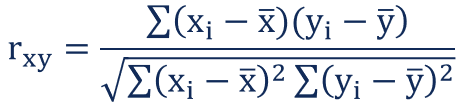
* This value can be calculated only between two numeric columns Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Brand', 'Year', 'Model','Car/SUV' ,'Title','Engine','FuelConsumption','Kilometres','ColourExtInt','Location','Price']

# Creating the correlation matrix
CorrelationData=VehicleData[ContinuousCols].corr()
CorrelationData

In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

#Observations from Step 21
* Final selected Continuous columns:

* 'Price'

#Step 22: Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots, and
* Measure the strength of relation using Anova test.

In [ ]:
# Box plots for continuous Target Variable "Price" and Categorical predictors
CategoricalColsList=['UsedOrNew', 'Transmission', 'Drivetype', 'FuelType','CylinderEngine','BodyType','Doors','Seats']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    VehicleData.boxplot(column='Price', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

#Observations from Step 23: Box-Plots interpretation
* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

#Step 24: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.

* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)

* ANOVA Test result: Probability of H0 (Null Hypothesis being true)

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['UsedOrNew', 'Transmission', 'Drivetype', 'FuelType','CylinderEngine','BodyType','Doors','Seats']
FunctionAnova(inpData=VehicleData,
              TargetVariable='Price',
              CategoricalPredictorList=CategoricalPredictorList)

#Observations from Step 24
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable except 'sex'.

* This is something we can guess by looking at the box plots!

* Final selected Categorical columns:

  **'UsedOrNew', 'Transmission', 'Drivetype', 'FuelType','CylinderEngine','BodyType','Doors','Seats''**

#Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'UsedOrNew', 'Transmission', 'Drivetype', 'FuelType','CylinderEngine','BodyType','Doors','Seats'**

In [ ]:
SelectedColumns=['UsedOrNew', 'Transmission', 'Drivetype', 'FuelType','CylinderEngine','BodyType','Doors','Seats']

# Selecting final columns
DataForML=VehicleData[SelectedColumns]
DataForML.head()

In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## **Step 25: Data Pre-processing for Machine Learning Model Building or Model Development**
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Price']=VehicleData['Price']

# Printing sample rows
DataForML_Numeric.head()

## **Step 26: Machine Learning Model Development:**
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='Price'
Predictors=['Price','Kilometres' ]

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## **Step 27: Standardization/Normalization of data**
* we can choose not to run this step if we want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if we are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

## **Step 28: Multiple Linear Regression Algorithm For ML/AI model building**

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Decision Regressor Tree

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting/Visualising the Decision Tree

In [ ]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(RegModel, out_file=None,
                                feature_names=Predictors, class_names=TargetVariable)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in

#Random Forest Regressor

In [ ]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
    TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting One of the Decision Tree in Random Forest Regressor

In [ ]:
# Plotting a single Decision Tree from Random Forest
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Create DOT data for the 6th Decision Tree in Random Forest
dot_data = tree.export_graphviz(RegModel.estimators_[5] , out_file=None, feature_names=Predictors, class_names=TargetVariable)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1600,height=1000)
# Double click on the graph to zoom in


## **Step 29: AdaBoost Algorithm For ML/AI model building**

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#XGBoost Regressor

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
 TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

#K-Nearest Neighbor(KNN)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Support Vector Machine (SVM) Regressor

In [ ]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Price']-TestingDataResults['PredictedPrice']))/TestingDataResults['Price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Step 30: Model Deployment

* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing XGboost as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are **'age', 'children'**. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='Price'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'children']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

# Cross validating the final model accuracy with less predictors

In [ ]:
# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=6,
                      learning_rate=0.7,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Step 31: Retraining the final model using 100% data


In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# **Step 32: Save the model as a serialized file which can be stored anywhere**

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

#Step 33: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['Price', 'Kilometres']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

#Step 33: Calling the function for some new data

In [ ]:
import pandas as pd

# Define the function for prediction
def FunctionPredictResult(InputData):
    # Load necessary libraries and models
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel = pickle.load(fileReadStream)

    # Load the data used for model training
    DataForML = pd.read_pickle('DataForML.pkl')

    # Combine the new input data with the training data
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Ensure that the input data has the same columns as it was used for training
    Predictors = ['Kilometres', 'Price']

    # Extract the relevant features and generate dummy variables if necessary
    InputData = InputData[Predictors]

    # If there are nominal variables requiring dummy encoding, you can apply pd.get_dummies here

    # Assuming PredictorScalerFit is defined elsewhere and used for standardization
    # X = PredictorScalerFit.transform(InputData)

    # Generate predictions
    Predictions = PredictionModel.predict(InputData)

    # Create a DataFrame to store the predictions
    PredictionResult = pd.DataFrame(Predictions, columns=['Prediction'])

    return PredictionResult

# Define the new sample data
NewSampleData = pd.DataFrame(data=[[21, 0], [28, 3]], columns=['Price', 'Kilometres'])

# Call the function to predict on the new data
prediction_result = FunctionPredictResult(NewSampleData)

# Print the prediction result
print(prediction_result)

# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the house price tasks  in the platform /system.

# Desktop App deployment: Tkinter package
* Will not work on Google Colab.
* Need to use PyCharm to run this code.
* We need to make sure  we include the data file (Vehicle.csv)

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class HousePricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Australian Vehicle Price Prediction')
        self.data = pd.read_csv('Vehicle.csv')
        self.sliders = []

        self.X = self.data.drop('Price', axis=1).values
        self.y = self.data['Price'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Car Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted car price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = CarPricePredictionApp(root)
    root.mainloop()

#**END OF PROGRAMMING PROJECT**